# Assignment 2 - Leonardo Stoppani
### Plot the auto-correlogram of the temperature data in the appliances [dataset](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction#)

### Get Data

In [52]:
# import the dataset 
import pandas as pd

df = pd.read_csv(r'./energydata_complete.csv', parse_dates=['date'], index_col='date')

# define dict for sensors name 
sensors = {1:"Kitchen", 2:"Living", 3:"Laundry", 4:"Office", 5:"Bathroom", 
           6:"Outside North", 7:"Ironing", 8:"Teenager", 9:"Parents",}

# set index and dict for time
# df["index"] = range(len(df))
# time = dict(zip(df["date"],df["index"]))
# df.set_index("index", inplace=True)
print(df.info())
#print(time)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

### Plot data
From a first visualization of the data, we see the time sries should have an increasing trend, also as we expect high and low temperature repeat tehm selfs in time.

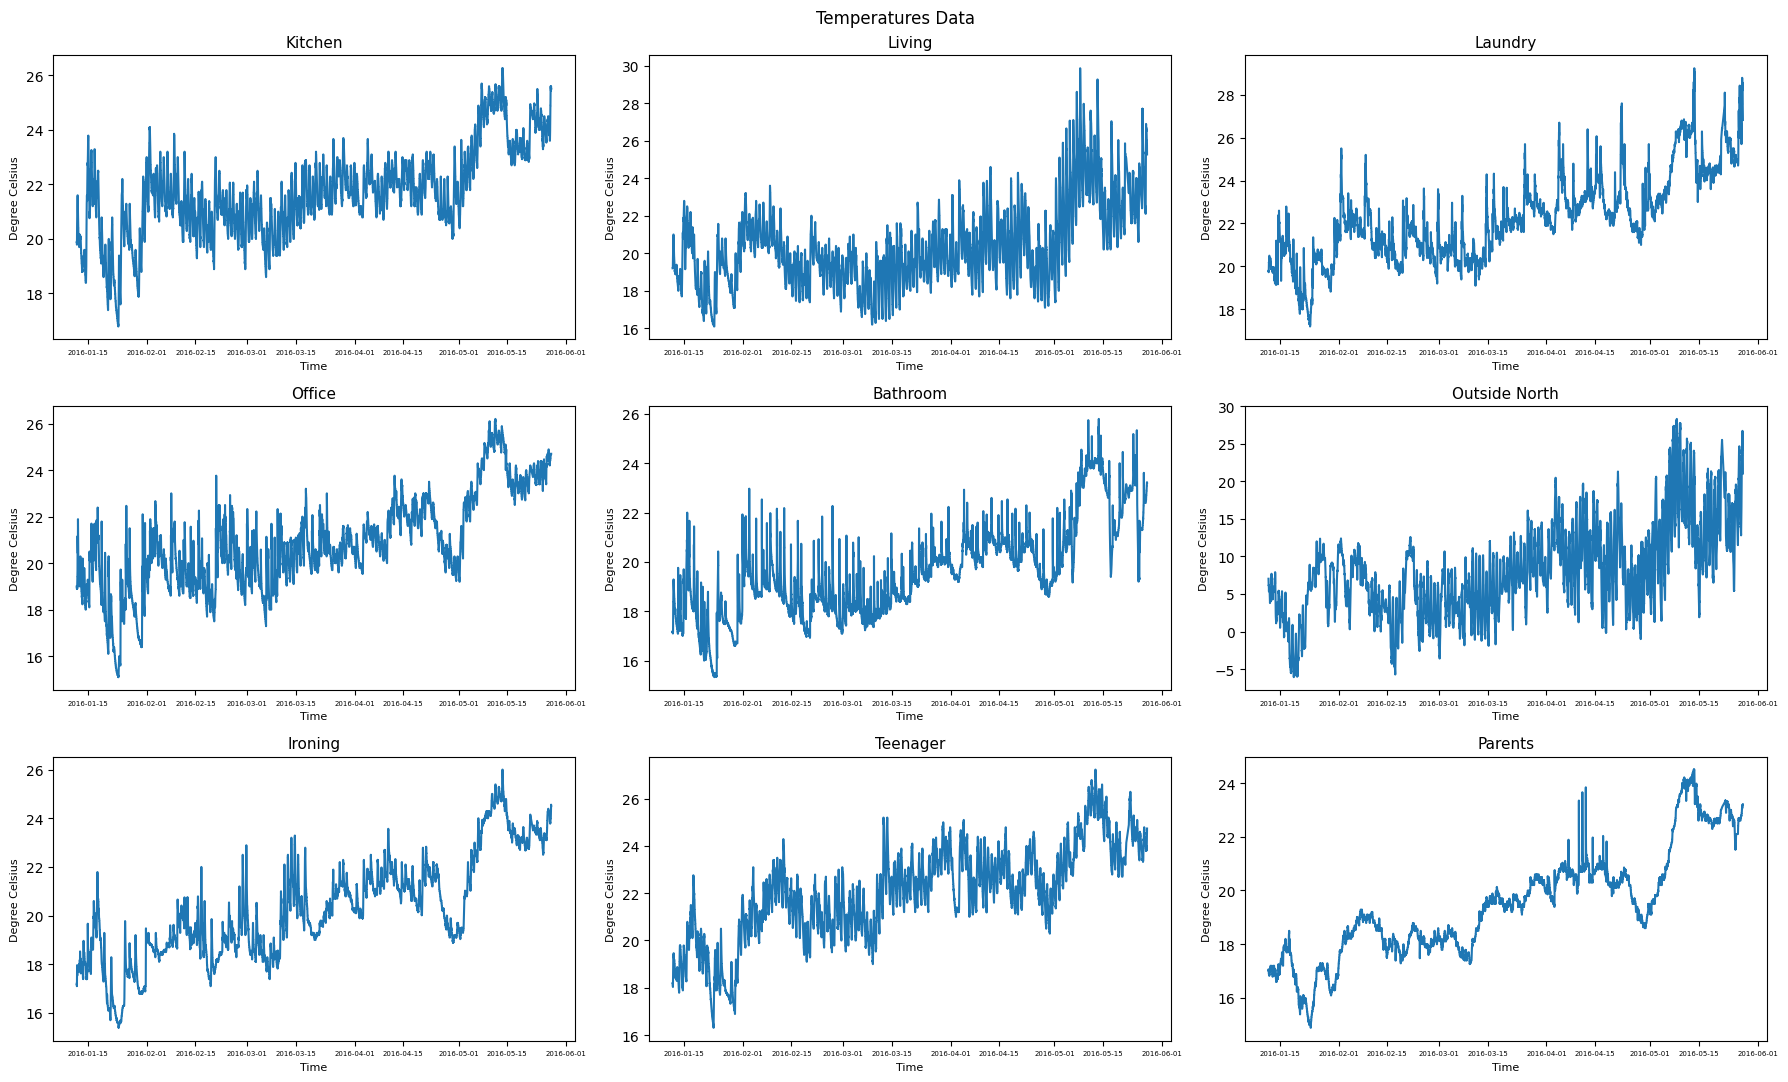

In [3]:
# plot data to understand best lag value (k)
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import numpy as np

figure, axis = plt.subplots(3, 3, figsize=(18, 11))
plt.style.use("ggplot")

k=0
for i in range(3):
    for j in range(3):
        k+=1
        data = df['T'+str(k)]
        #print(data)
        result = axis[i,j].plot(data)
        axis[i,j].set_title(sensors[k], fontsize=11)
        axis[i,j].set_xlabel("Time", fontsize=8)
        axis[i,j].set_ylabel("Degree Celsius", fontsize=8)
        axis[i,j].tick_params(axis="x", labelsize=5) 

figure.suptitle("Temperatures Data")
figure.tight_layout()
plt.show()


### Seasonality Analysis
To understand better we decompose the time series to see if there are seasonality with a given period. It make sense for the type of measuration that value will repeat every day, tipically temperature change from day to night and then reapeat itself. Usually we don't expect big change in near days, but instead a trend to increase.

First we try with period equal a month.

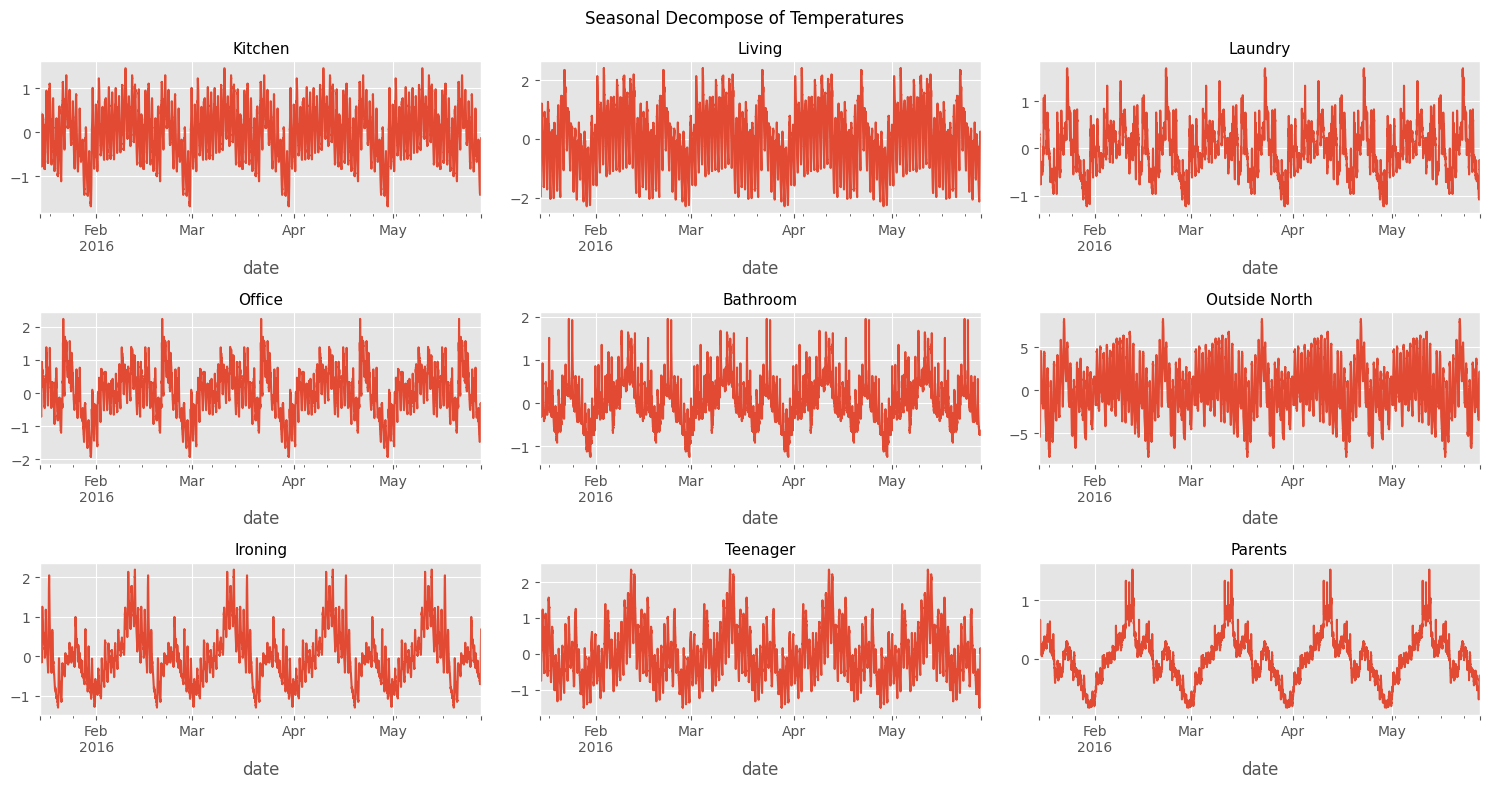

In [4]:
#Period = Month

import statsmodels.api as sm

figure, axis = plt.subplots(3, 3, figsize=(15, 8))
plt.style.use("ggplot")

k=0
for i in range(3):
    for j in range(3):
        k+=1
        data = df['T'+str(k)]
        #print(data)
        decomposition = sm.tsa.seasonal_decompose(data, period=4320) #1 day 144 , 1 month 4320
        decomposition.seasonal["2016-01-15 00:00:00":"2016-06-01 00:00:00"].plot(ax=axis[i,j])
        axis[i,j].set_title(sensors[k], fontsize=11)

figure.suptitle("Seasonal Decompose of Temperatures")
figure.tight_layout()
plt.show()



Then we move to period equal a day.

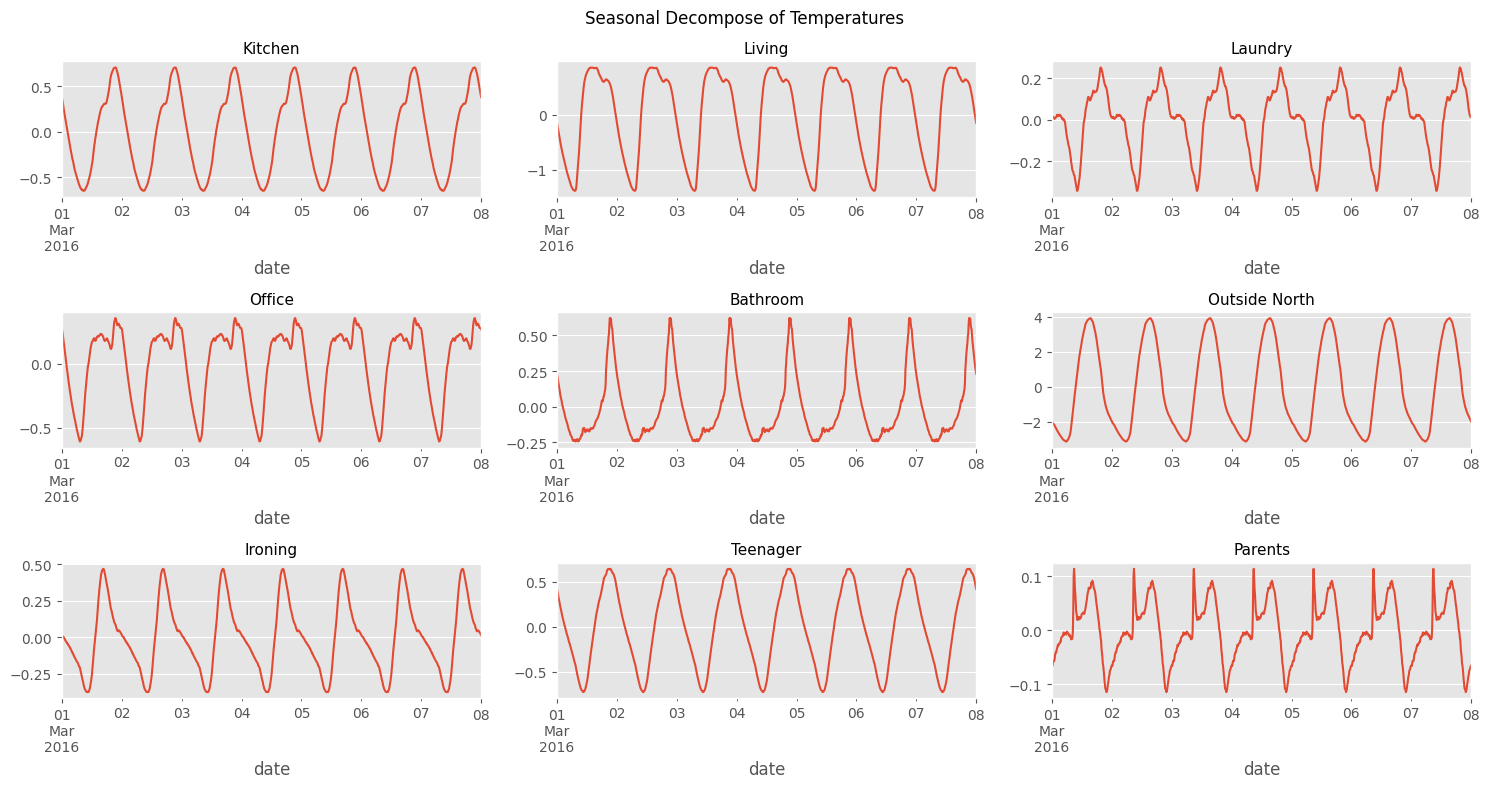

In [5]:
# Period = 1 Day 
figure, axis = plt.subplots(3, 3, figsize=(15, 8))
plt.style.use("ggplot")

k=0
for i in range(3):
    for j in range(3):
        k+=1
        data = df['T'+str(k)]
        #print(data)
        decomposition = sm.tsa.seasonal_decompose(data, period=144) 
        decomposition.seasonal["2016-03-01 00:00:00":"2016-03-8 00:00:00"].plot(ax=axis[i,j])
        axis[i,j].set_title(sensors[k], fontsize=11)

figure.suptitle("Seasonal Decompose of Temperatures")
figure.tight_layout()
plt.show()

For the two period tested the tie series seems to have a sinusoidal periodicity, so an idea is to perform convolution with sinusoids signal in order to find all the seasonality.

In [6]:
# convolute sinusoids filters

#### Trend Analysis
We already see from the plot of data that the temperature are increasing in time, due to transition from winter to summer.

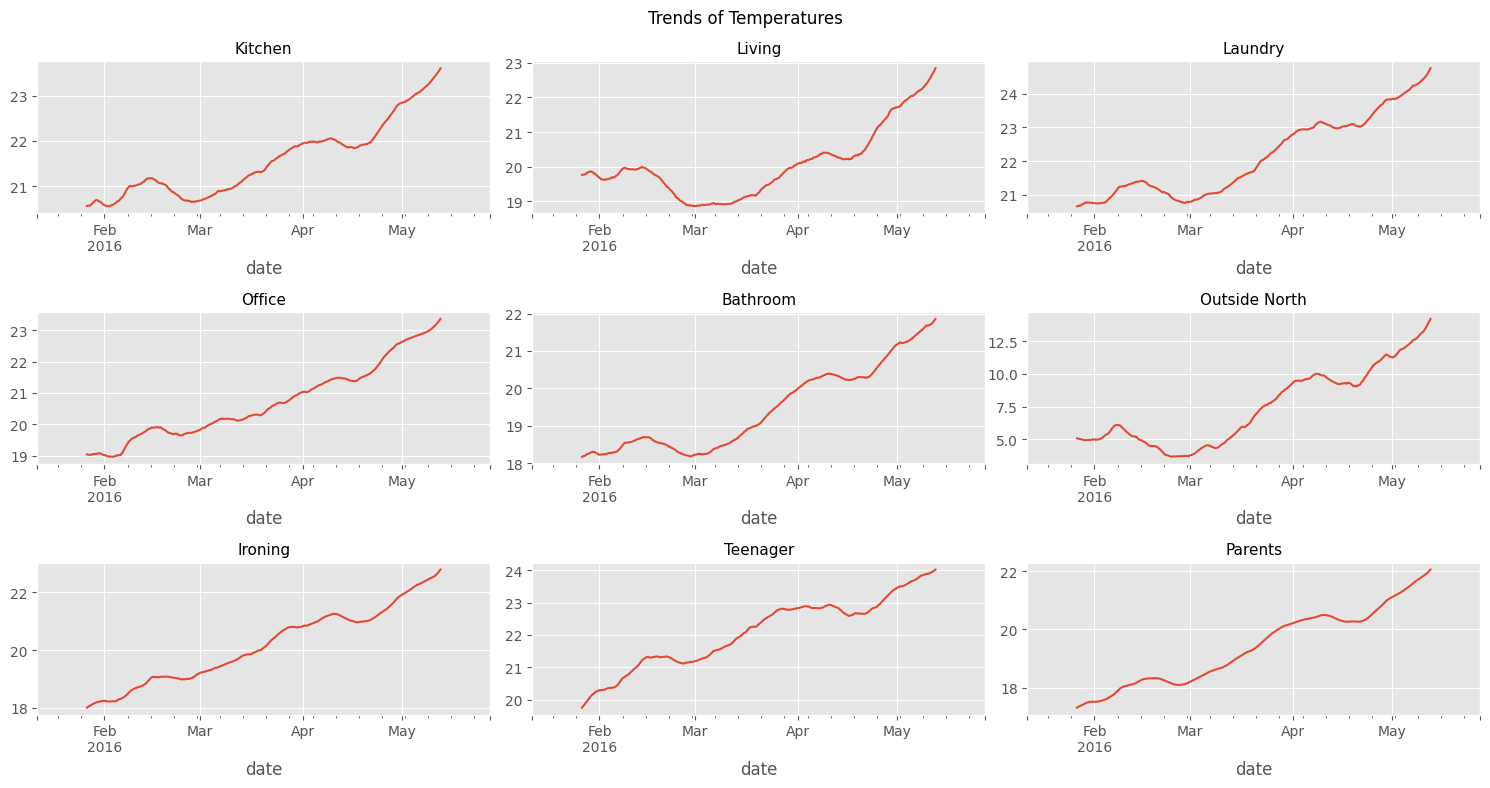

In [54]:
figure, axis = plt.subplots(3, 3, figsize=(15, 8))
plt.style.use("ggplot")

k=0
for i in range(3):
    for j in range(3):
        k+=1
        data = df['T'+str(k)]
        #print(data)
        decomposition = sm.tsa.seasonal_decompose(data, period=4320) 
        decomposition.trend.plot(ax=axis[i,j])
        axis[i,j].set_title(sensors[k], fontsize=11)

figure.suptitle("Trends of Temperatures")
figure.tight_layout()
plt.show()

#### Noise

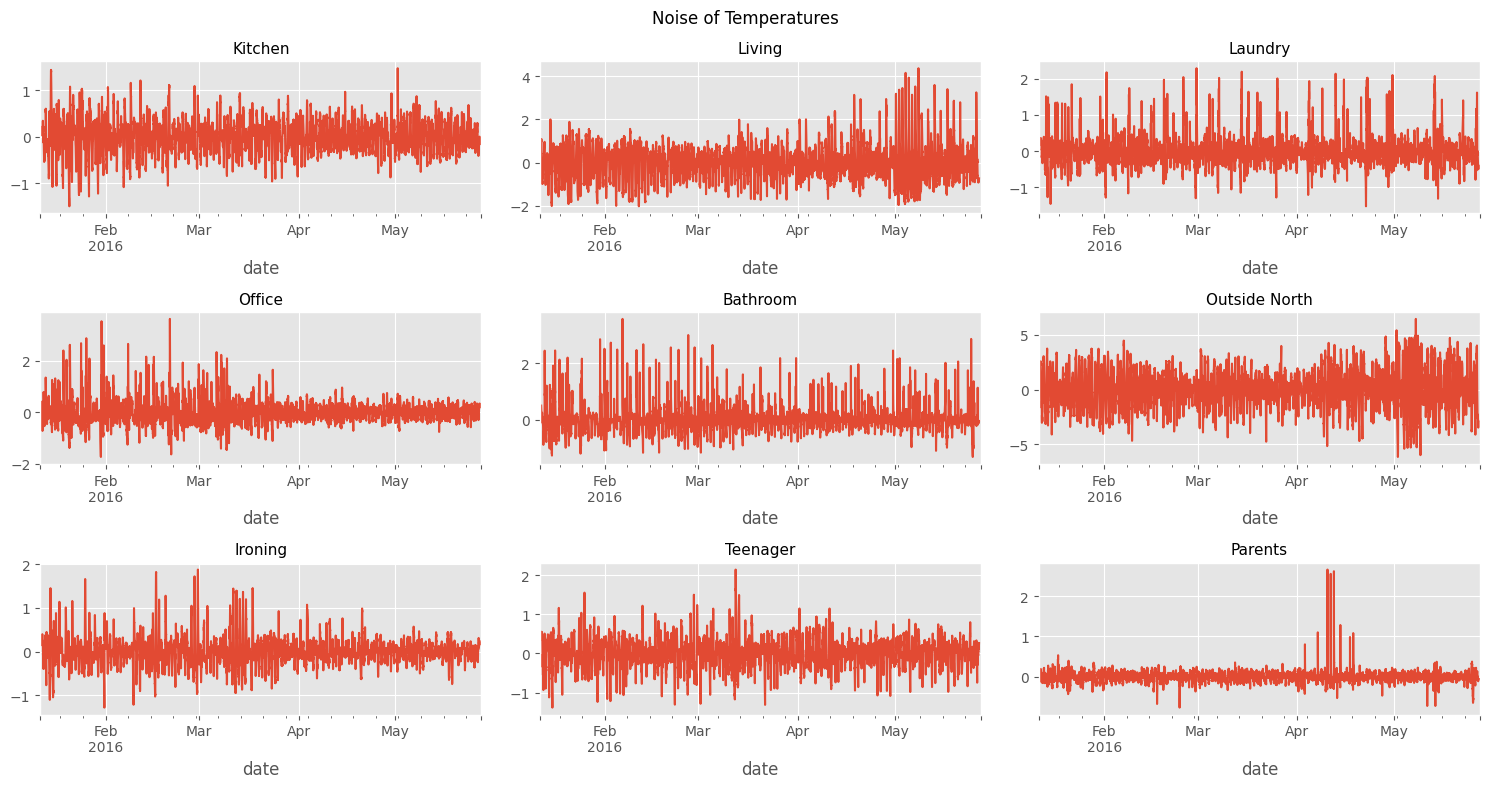

In [56]:
figure, axis = plt.subplots(3, 3, figsize=(15, 8))
plt.style.use("ggplot")

k=0
for i in range(3):
    for j in range(3):
        k+=1
        data = df['T'+str(k)]
        #print(data)
        decomposition = sm.tsa.seasonal_decompose(data, period=144) 
        decomposition.resid.plot(ax=axis[i,j])
        axis[i,j].set_title(sensors[k], fontsize=11)

figure.suptitle("Noise of Temperatures")
figure.tight_layout()
plt.show()

In [ ]:
# clean noisy data



### Auto-correlation plot
After decomposing the time series in their seasonal, trend and noise component, we can plot seasonal auto-correlation, removing noise and trend from our data. We also observe two periodicity, one day and one month, that could be used as lag values.

After looking at the seasonality of the time series, now we have good value for the lag (k) to plot the auto-correlation. 

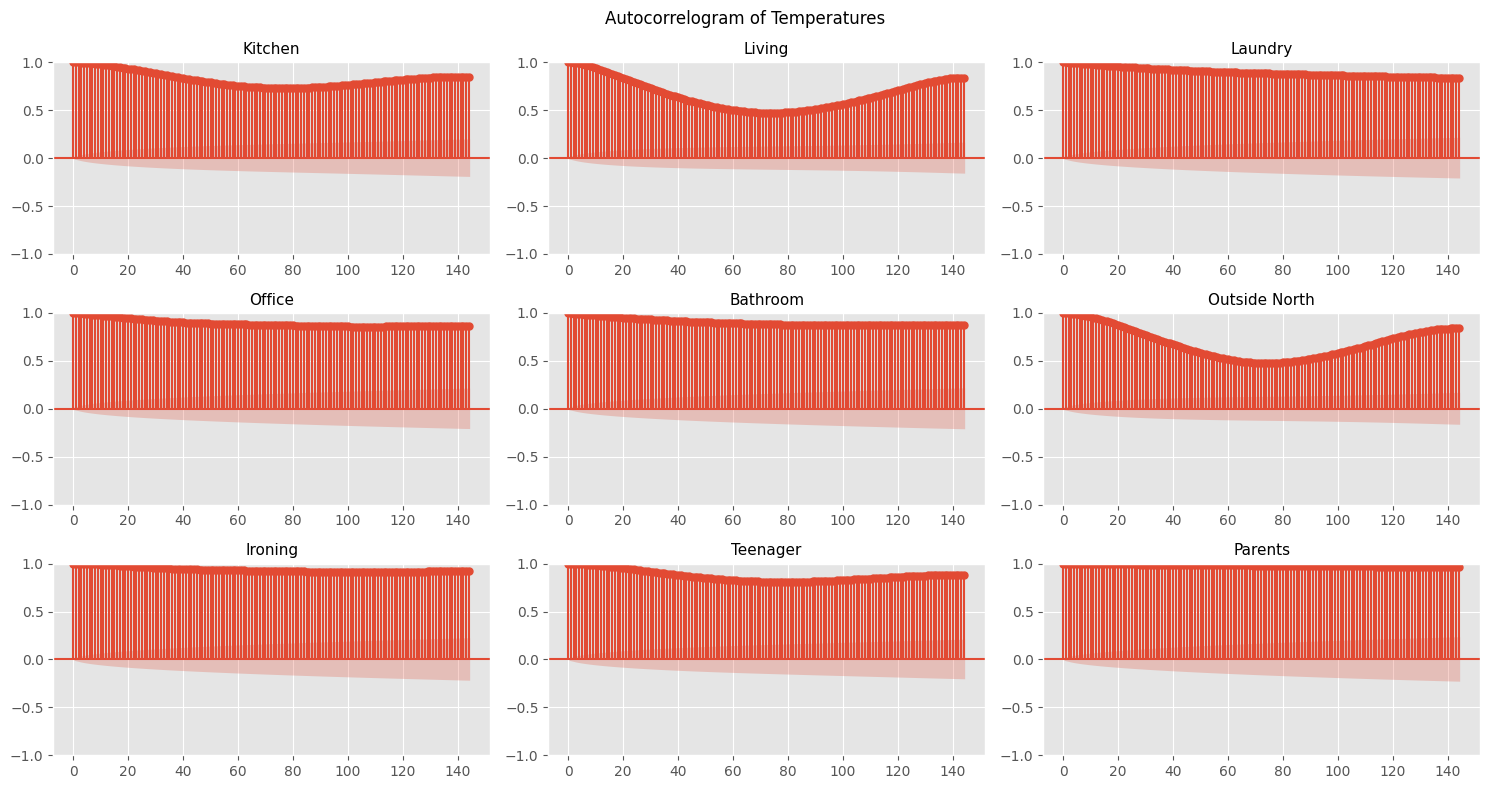

In [57]:
# plot autocorrelation  
#fig = tsaplots.plot_acf(data, lags = 200)

figure, axis = plt.subplots(3, 3, figsize=(15, 8))
plt.style.use("ggplot")

k=0
for i in range(3):
    for j in range(3):
        k+=1
        data = df['T'+str(k)].to_numpy()
        decomposition = sm.tsa.seasonal_decompose(data, period=144) 
        tsaplots.plot_acf(data, lags = 144, ax=axis[i,j])
        axis[i,j].set_title(sensors[k], fontsize=11)

figure.suptitle("Autocorrelogram of Temperatures")
figure.tight_layout()
plt.show()


Plotting raw data with 10 minutes interval gives noise representation. We try to subsampling the data to 1 hour interval.

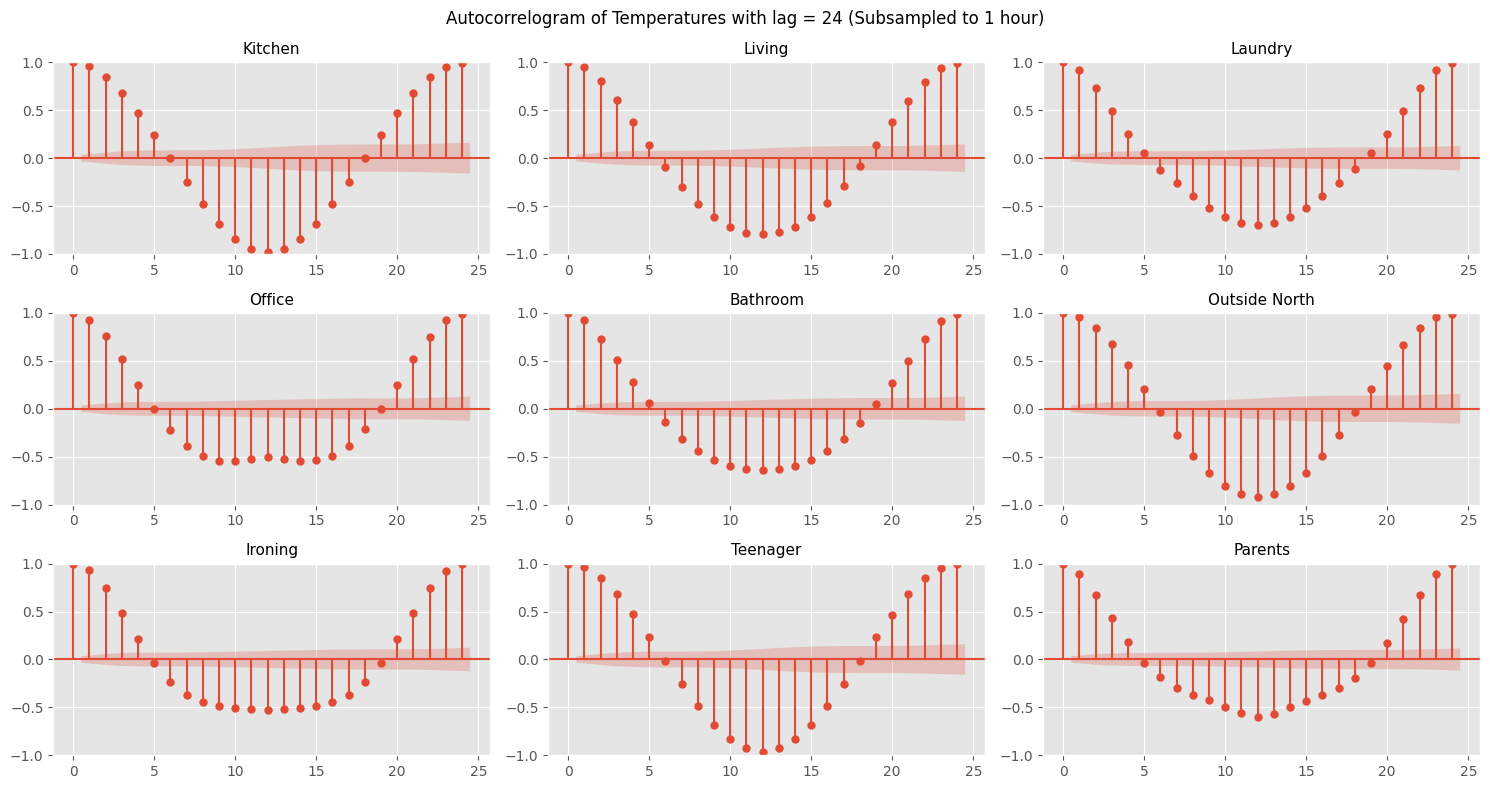

In [72]:
# subsampling 6 row into 1 and take average temperature every hour
df_sub = df.resample('60T').mean() # one line every hour
#print(df_sub.head())
#print(df_sub.info())

figure, axis = plt.subplots(3, 3, figsize=(15, 8))
plt.style.use("ggplot")

k=0
for i in range(3):
    for j in range(3):
        k+=1
        data = df_sub['T'+str(k)].to_numpy()
        # now we have 1 hour interval
        decomposition = sm.tsa.seasonal_decompose(data, period=24) #1 week 168, 1 day 24, 1 month 720, 5 day 120
        tsaplots.plot_acf(decomposition.seasonal, lags = 24, ax=axis[i,j])
        axis[i,j].set_title(sensors[k], fontsize=11)

figure.suptitle("Autocorrelogram of Temperatures with lag = 24 (Subsampled to 1 hour)")
figure.tight_layout()
plt.show()